# Visualising Earnings Based on College Majors

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
recent_grads=pd.read_csv('recent-grads.csv')
recent_grads.iloc[0]
print(recent_grads.head())
print(recent_grads.tail())

   Rank  Major_code                                      Major    Total  \
0     1        2419                      PETROLEUM ENGINEERING   2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405                       CHEMICAL ENGINEERING  32260.0   

       Men    Women Major_category  ShareWomen  Sample_size  Employed  \
0   2057.0    282.0    Engineering    0.120564           36      1976   
1    679.0     77.0    Engineering    0.101852            7       640   
2    725.0    131.0    Engineering    0.153037            3       648   
3   1123.0    135.0    Engineering    0.107313           16       758   
4  21239.0  11021.0    Engineering    0.341631          289     25694   

       ...        Part_time  Full_time_year_round  Unemployed  \
0      ...              270                  

In [3]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [4]:
recent_grads.info()
raw_data_count=len(recent_grads.index)
recent_grads=recent_grads.dropna()
cleaned_data_count=len(recent_grads.index) #counting no. of rows
print(raw_data_count)
print(cleaned_data_count)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

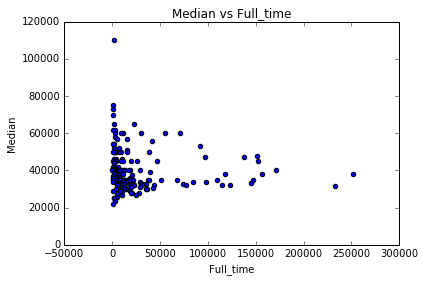

In [5]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter', title='Median vs Full_time')

(0, 50000)

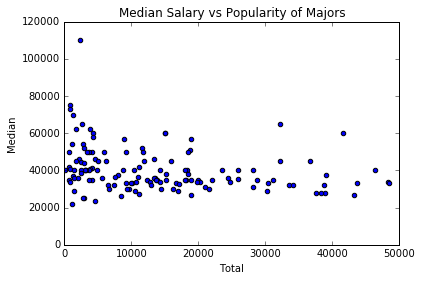

In [6]:
ax=recent_grads.plot(x='Total', y='Median', kind='scatter', title='Median Salary vs Popularity of Majors')
ax.set_xlim(0,50000)

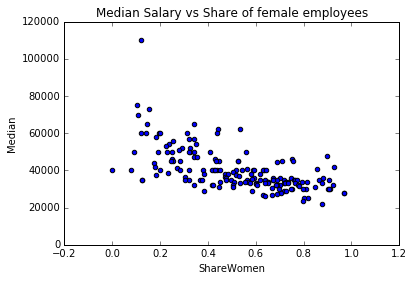

In [7]:
recent_grads.plot(x='ShareWomen', y='Median', kind='scatter', title='Median Salary vs Share of female employees')

# Analysis from the Plots

From our analysis of the above scatter plots, we can answer the following questions:

**Do students in more popular majors make more money?**
No, this does not seem to be the case at all and actually, students in less popular majors make more money.

**Do students that majored in subjects that were majority female make more money?**
No, this also does not seem to be the case at all. Students who majored in subejects that were majority female make almost the same money if not a little less, in general.

**Is there any link between the number of full-time employees and median salary?**
Judging from the graph, we see that there's no direct link between the number of full-time employees and median salary.

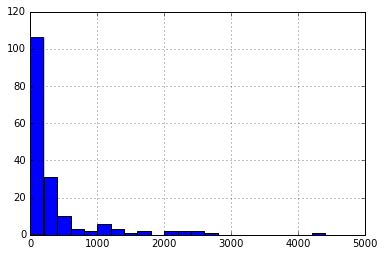

In [8]:
recent_grads['Sample_size'].hist(bins=25, range=(0,5000))

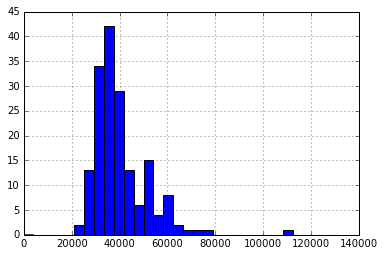

In [9]:
recent_grads['Median'].hist(bins=30, range=(0,125000))

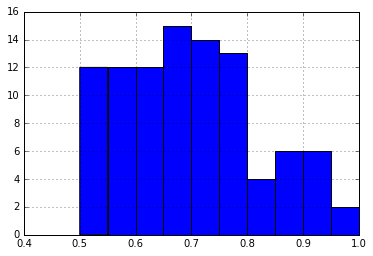

In [10]:
recent_grads['ShareWomen'].hist(bins=10, range=(0.5,1.0))

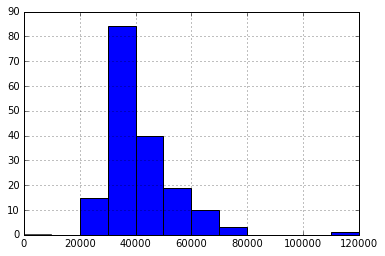

In [11]:
recent_grads['Median'].hist(bins=12, range=(0, 120000))

# Analysis from the Histograms

From our analysis of the above histograms, we can answer the following questions:

**What percent of majors are predominantly male? Predominantly female?**
44.2% of majors are predominantly male. On the other hand, 55.8% of the majors are predominantly female.

**What's the most common median salary range?**
The most common median salary range is 30,000 - 40,000 with about 50% of the majors getting a salary within this range.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f58cee198>,
      dtype=object)

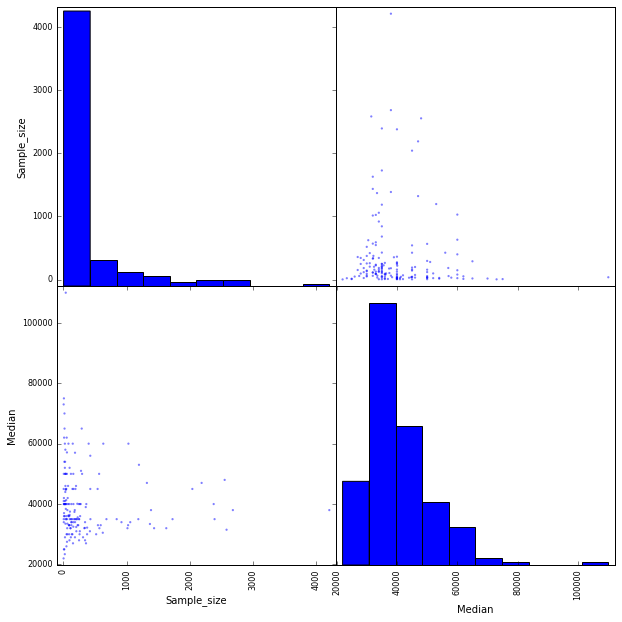

In [12]:
from pandas.plotting import scatter_matrix 
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10, 10))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f588ebc50>,
      dtype=object)

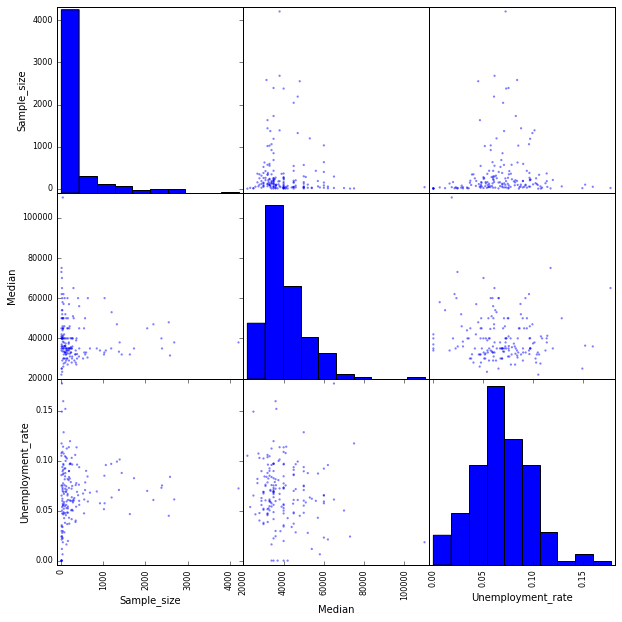

In [13]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f58557160>,
      dtype=object)

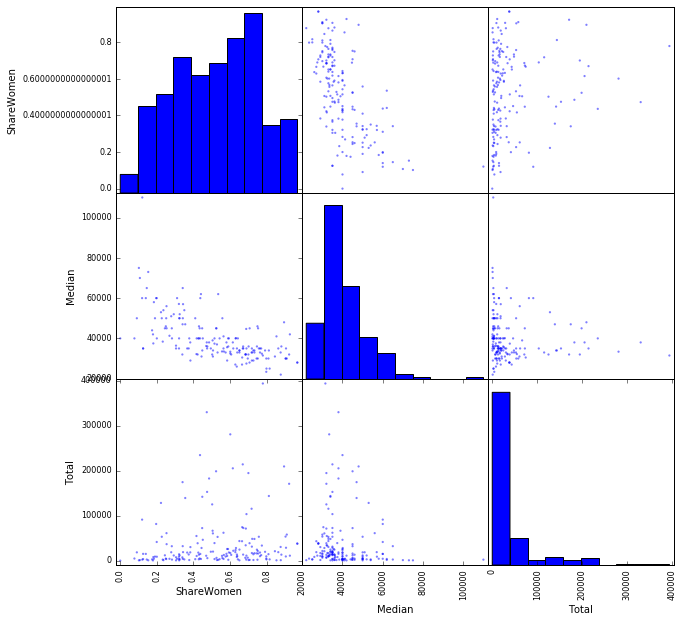

In [14]:
scatter_matrix(recent_grads[['ShareWomen', 'Median', 'Total']], figsize=(10, 10))

# Advantage of Scatter Matrix Plots

In previous cells, we created individual scatter plots to visualize potential relationships between columns and histograms to visualize the distributions of individual columns. A scatter matrix plot combines both scatter plots and histograms into one grid of plots and allows us to explore potential relationships and distributions simultaneously. Hence, we can derive all our inferences and analyse data from a single graph!

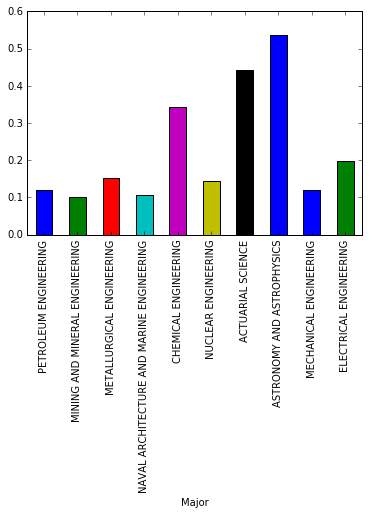

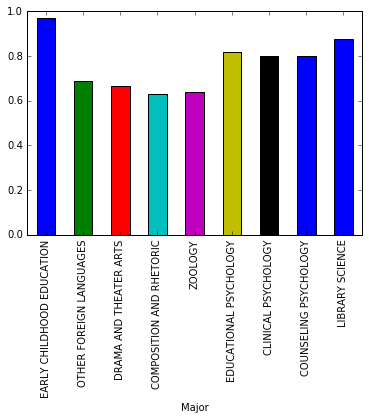

In [15]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
recent_grads[163:].plot.bar(x='Major', y='ShareWomen', legend=False)

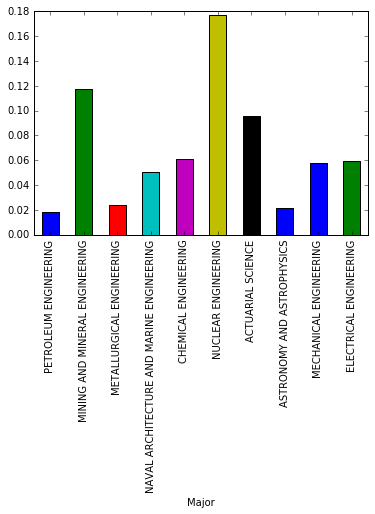

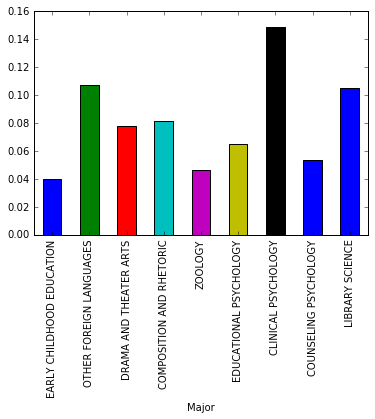

In [16]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', legend=False)
recent_grads[163:].plot.bar(x='Major', y='Unemployment_rate', legend=False)